<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task1: Become familiar with the dataset


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [17]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [18]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [19]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2 Generate Descriptive Statistics and Visualizations

**Question 1: box plot for the "Median value of owner-occupied homes"**  

Text(0.5, 1.0, 'Owner-occupied homes')

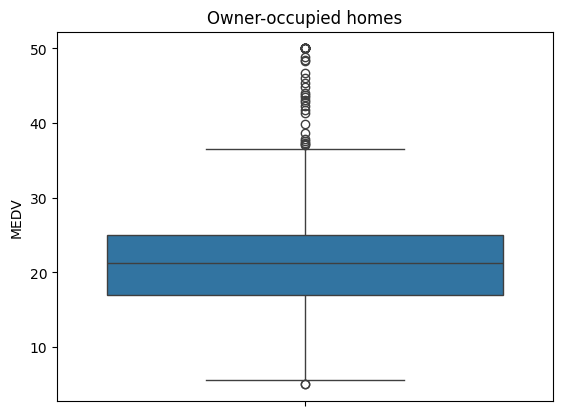

In [33]:
sns.boxplot(y = 'MEDV', data = boston_df)
plt.title('Owner-occupied homes')

The boxplot above shows the median value for the variable MEDV (in $1000's) among with outliers

**Question 2: bar plot for the Charles river variable**

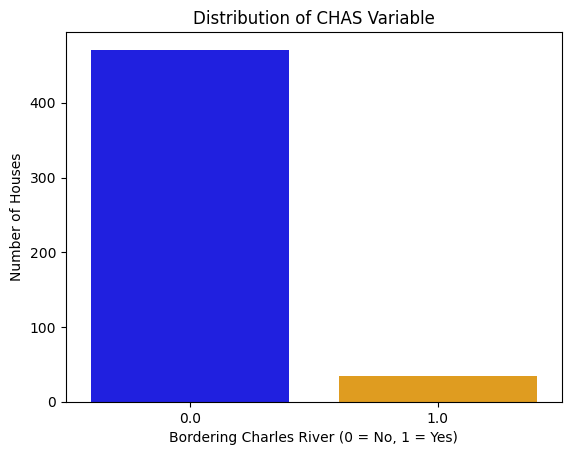

In [38]:
sns.countplot(x='CHAS', hue='CHAS', data=boston_df, palette={0: 'blue', 1: 'orange'}, legend=False)
plt.xlabel('Bordering Charles River (0 = No, 1 = Yes)')
plt.ylabel('Number of Houses')
plt.title('Distribution of CHAS Variable')
plt.show()

The histogram shows that the majority of the houses are not near the Charles River

**Question 3: boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [43]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

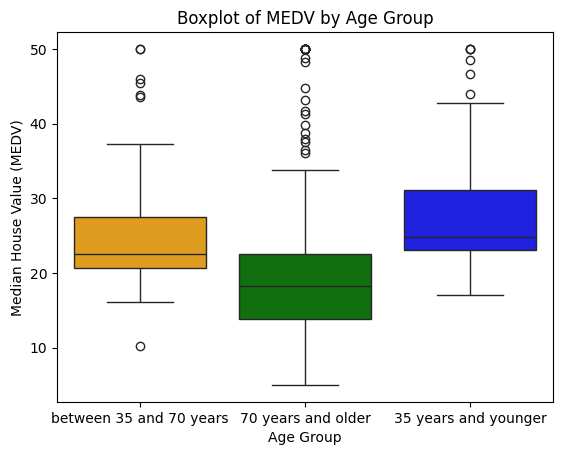

In [56]:
sns.boxplot(x='Age_Group',y ='MEDV' ,data = boston_df, hue='Age_Group',
    palette={
        '35 years and younger': 'blue',
        'between 35 and 70 years': 'orange',
        '70 years and older': 'green'
    },
    legend=False )
plt.xlabel('Age Group')
plt.ylabel('Median House Value (MEDV)')
plt.title('Boxplot of MEDV by Age Group')
plt.show()

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

**Question4: Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

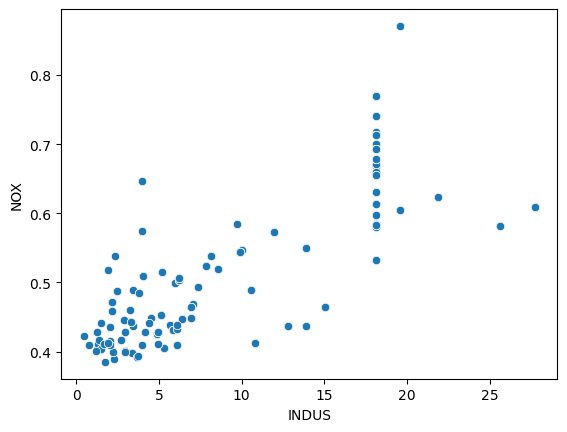

In [60]:
#NOX
#INDUS - proportion of non-retail business acres per town.
sns.scatterplot(y='NOX',x='INDUS',data=boston_df)

General upward trend: As the proportion of non-retail business acres (INDUS) increases, the concentration of nitric oxide (NOX) also tends to increase.

Vertical clustering at INDUS ≈ 18.0: There is a noticeable cluster of data points at a constant INDUS value, likely due to designated zoning categories or block-assigned values. This could indicate data irregularities or planned zoning areas.

Non-perfectly linear relationship: While the relationship is not strictly linear, a positive correlation between INDUS and NOX is clearly observable.

**Question 5: histogram for the pupil to teacher ratio variable**

In [62]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


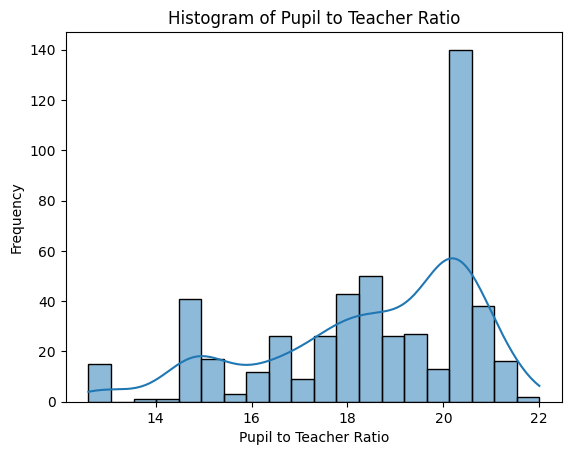

In [63]:
sns.histplot(data=boston_df, x='PTRATIO', bins=20, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

**Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Hypotheses:

Null Hypothesis: There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis: There's a significant difference in median value between houses bounded and not bounded by the Charles River

α (significance level): 0.05


In [75]:
# 1. T-test: Difference in MEDV for CHAS=1 and CHAS=0
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat1, p_val1 =scipy.stats.ttest_ind(medv_chas1, medv_chas0, equal_var=True)
print("statistic=",t_stat1,"\npvalue=", p_val1)

statistic= 3.996437466090509 
pvalue= 7.390623170519905e-05


Since the p-value < 0.05, we reject the null hypothesis. This means that there is a statistically significant difference in the median value of houses based on whether they are bounded by the Charles River.

**Question 2: is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Hypotheses

Null Hypotesis: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

α (significance level): 0.05


In [81]:
# 2. ANOVA: Difference in MEDV across AGE groups
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100],
                                 labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
anova_result = ols('MEDV ~ C(Age_Group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Age_Group),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


Since the p-value=1.710501e-15 is much smaller than 0.05, we reject the null hypothesis. There is strong statistical evidence to conclude that the median value of houses differs significantly across the different age groups of owner-occupied units.

**Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Hypotheses

Null Hypotesis: There is no linear relationship between NOX and INDUS

Alternative Hypothesis: There is a linear relationship between NOX and INDUS

α (significance level): 0.05

In [83]:
corr_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


Pearson correlation coefficient ≈ 0.764 → positive correlation                                                                       
P-value ≈ 7.9 × 10⁻⁹⁸ < 0.05                                                                                                               
We reject the null hypothesis.                                                                                                               
There is a statistically significant positive linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

**QuestionWhat is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

Hypotheses     
                                                                                      
Null hypothesis: There is no impact of distance (DIS) on MEDV (coefficient = 0).                                  

Alternative hypothesis: There is an impact (coefficient ≠ 0).

In [87]:
model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        11:10:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

Since p < 0.05, we reject H₀.                                                              
Interpretation: There is a statistically significant positive relationship between the distance to employment centers and house value.
For each additional unit of distance (DIS), the median home value (MEDV) increases by approximately 1.09 units.